In [1]:
import mglearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score  
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor

#### 공식(Formula)을 통한 선형회귀

#### EX1

In [2]:
x_data = np.array(list( range(1,11) )).reshape(-1,1)
y_data = list( range(1,11) )

In [3]:
# n 행 1열 : 행(데이터 개수), 열(특성데이터(예측변수) 개수)
x_data.shape

(10, 1)

In [4]:
model = LinearRegression()    # 공식
model.fit( x_data, y_data )   # 특성데이터는 반드시 행렬(np 2차원), 데이터프레임으로 줘야한다
print(model.coef_)            # w(slope value)
print(model.intercept_)       # b(intercept)

[1.]
2.6645352591003757e-15


#### EX2. Cars data

In [5]:
cardf = pd.read_csv('data1/cars.csv')
modelCar = LinearRegression()  
modelCar.fit( cardf[ ['speed'] ], cardf[ ['dist'] ] )
print(modelCar.coef_)            # w(slope value)
print(modelCar.intercept_)       # b(intercept)

[[3.93240876]]
[-17.57909489]


- 자동파 속도(speed)가 15이면 예측되는 제동거리(dist)는 ?

In [6]:
modelCar.coef_[0]*15 + modelCar.intercept_      

array([41.4070365])

In [7]:
modelCar.predict([ [15] ])   # 행렬 형태로 부여 : 행렬곱을 수행

array([[41.4070365]])

- 자동파 속도(speed)가 13, 15이면 예측되는 제동거리(dist)는 ?

In [8]:
modelCar.predict([ [13], [15] ])  

array([[33.54221898],
       [41.4070365 ]])

In [9]:
x = np.array( [[1,2], [3,4]] )
y = np.array( [[3,4], [5,6]] )
np.multiply(x, y)

array([[ 3,  8],
       [15, 24]])

In [10]:
modelCar.predict( cardf[ ['speed'] ] )

array([[-1.84945985],
       [-1.84945985],
       [ 9.94776642],
       [ 9.94776642],
       [13.88017518],
       [17.81258394],
       [21.7449927 ],
       [21.7449927 ],
       [21.7449927 ],
       [25.67740146],
       [25.67740146],
       [29.60981022],
       [29.60981022],
       [29.60981022],
       [29.60981022],
       [33.54221898],
       [33.54221898],
       [33.54221898],
       [33.54221898],
       [37.47462774],
       [37.47462774],
       [37.47462774],
       [37.47462774],
       [41.4070365 ],
       [41.4070365 ],
       [41.4070365 ],
       [45.33944526],
       [45.33944526],
       [49.27185401],
       [49.27185401],
       [49.27185401],
       [53.20426277],
       [53.20426277],
       [53.20426277],
       [53.20426277],
       [57.13667153],
       [57.13667153],
       [57.13667153],
       [61.06908029],
       [61.06908029],
       [61.06908029],
       [61.06908029],
       [61.06908029],
       [68.93389781],
       [72.86630657],
       [76

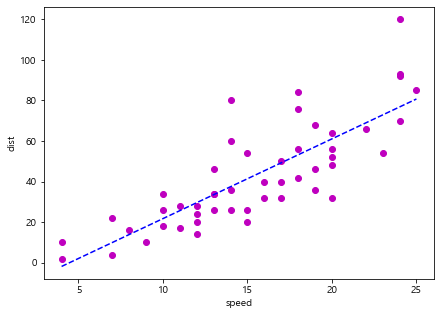

In [11]:
plt.figure( figsize=(7,5))
plt.xlabel('speed');plt.ylabel('dist')
plt.scatter( cardf['speed'], cardf['dist'], color='m' )
plt.plot( cardf['speed'], modelCar.predict( cardf[ ['speed'] ] ), 'b--' )
plt.show()

#### EX3. Electric data
- electric.csv  w, b를 구하시고전기생산량이 3.2, 4.5 인경우 전기 사용량을 예측하시요. scatter(실제데이터), plot(예측데이터)를 그리시요.

In [12]:
eleDF = pd.read_csv('data4/electric.csv', index_col='Unnamed: 0')
eleDF[ ['전기생산량'] ].shape, eleDF[ ['전기사용량'] ].shape

((12, 1), (12, 1))

In [13]:
modelEle = LinearRegression()  
modelEle.fit( eleDF[ ['전기생산량'] ], eleDF[ ['전기사용량'] ] ) 
modelEle.coef_, modelEle.intercept_

(array([[0.49560324]]), array([0.91958143]))

In [14]:
modelEle.predict([ [3.2], [4.5] ])  

array([[2.50551178],
       [3.14979599]])

In [15]:
eleDF[[ '전기생산량' ]]

,전기생산량
0,3.52
1,2.58
2,3.31
3,4.07
4,4.62
5,3.98
6,4.29
7,4.83
8,3.71
9,4.61


In [16]:
modelEle.predict( eleDF[ ['전기생산량'] ] )

array([[2.66410482],
       [2.19823778],
       [2.56002814],
       [2.9366866 ],
       [3.20926838],
       [2.89208231],
       [3.04571931],
       [3.31334506],
       [2.75826943],
       [3.20431235],
       [2.85243405],
       [2.50551178]])

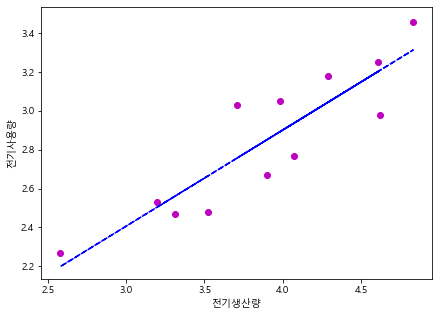

In [17]:
plt.figure( figsize=(7,5))
plt.xlabel('전기생산량');plt.ylabel('전기사용량')
plt.scatter( eleDF['전기생산량'], eleDF['전기사용량'], color='m' )
plt.plot( eleDF['전기생산량'], modelEle.predict( eleDF[ ['전기생산량'] ] ), 'b--' )
plt.show()

#### 결정 계수( $ \text{R}^2 $  : Coefficient of determination )

$$ SST = SSE + SSR $$

$$ \sum_{i=1}^n( y-  \bar{y})^2 =  \sum_{i=1}^n( y- \hat{y})^2  +  \sum_{i=1}^n( \hat{y}- \bar{y})^2$$


$$  R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}   $$

In [18]:
modelCar.score( cardf[ ['speed'] ], cardf.dist )

0.6510793807582509

In [19]:
y_predict =  modelCar.predict(  cardf[['speed']] )
r2_score( cardf.dist, y_predict )

0.6510793807582509

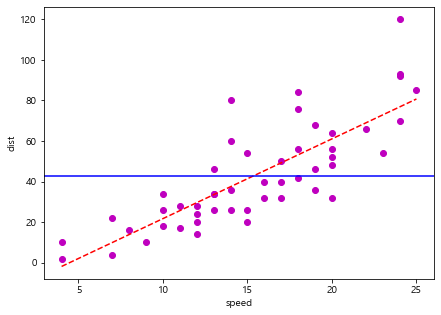

In [20]:
plt.figure( figsize=(7,5))
plt.xlabel('speed'); plt.ylabel('dist')
plt.scatter(cardf.speed, cardf.dist, color='m')
plt.plot( cardf.speed, modelCar.predict(  cardf[['speed']] ), 'r--')   # 예측값 선
plt.axhline( cardf.dist.mean(),color='blue')                           # 평균값 선
plt.show()

#### 학습(Learning)을 통한 선형회귀

In [21]:
# alpha = 0.0001 (learning rate)
# max_iter = 1000 (학습 횟수)
# ealry_stopping = False (cost 값이 변화가 없다. 즉 학습이 되어 최저점에 도달.)
modelSGD = SGDRegressor( max_iter = 100, alpha=0.0001, early_stopping=True, verbose=1 )
modelSGD.fit( cardf[ ['speed'] ], cardf['dist'] )

-- Epoch 1
Norm: 3.22, NNZs: 1, Bias: -1.171612, T: 45, Avg. loss: 848.603139
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.71, NNZs: 1, Bias: -1.437037, T: 90, Avg. loss: 164.451778
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.95, NNZs: 1, Bias: -1.628057, T: 135, Avg. loss: 120.040936
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.53, NNZs: 1, Bias: -1.736818, T: 180, Avg. loss: 130.806308
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.72, NNZs: 1, Bias: -1.942049, T: 225, Avg. loss: 144.152498
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.23, NNZs: 1, Bias: -2.055570, T: 270, Avg. loss: 148.024166
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.86, NNZs: 1, Bias: -2.163924, T: 315, Avg. loss: 125.257639
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.57, NNZs: 1, Bias: -2.341338, T: 360, Avg. loss: 145.534624
Total training time: 0.00 seconds.
Convergence after 8 epochs took 0.00 seconds


SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [22]:
modelSGD.coef_, modelSGD.intercept_

(array([2.56665256]), array([-2.34133794]))

In [23]:
modelSGD.score( cardf[ ['speed'] ], cardf.dist )

0.5209436501325649

#### 딥러닝(Deep learning)을 이용한 선형회귀

In [24]:
# hidden_layer_sizes=(크기, 출력개수, 히든레이어 개수)
modelNN = MLPRegressor( max_iter=5000, alpha=0.1, verbose=0, hidden_layer_sizes=(100, 10, 3) )
modelNN.fit( cardf[ ['speed'] ], cardf['dist'] )
# modelNN.coefs_

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 10, 3), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)

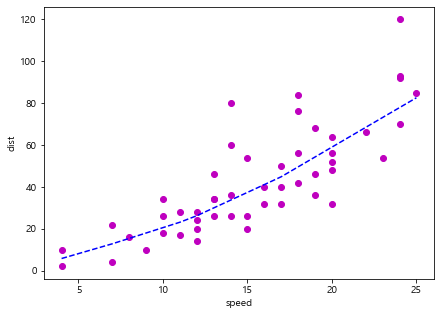

In [25]:
plt.figure( figsize=(7,5))
plt.xlabel('speed');plt.ylabel('dist')
plt.scatter( cardf['speed'], cardf['dist'], color='m' )
plt.plot( cardf['speed'], modelNN.predict( cardf[ ['speed'] ] ), 'b--' )
plt.show()